# Importing libraries 

In [389]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm


# Importing Dataset

In [390]:
df=pd.read_csv("walmart.csv")

# Basic Analysis

In [391]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [392]:
df.shape

(550068, 10)

There are 550068 rows and 10 columns in dataset

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [394]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**There is no null data in dataset**

# Statistical Summary

In [395]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**mean and median of Purchase column have a big difference which tells us that there are outliers in dataset**

# Non-Graphical Analysis

In [396]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [397]:
df.User_ID.value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [398]:
df.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [399]:
df.Product_ID.value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [400]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [401]:
df.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [402]:
df.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

# Visual Analysis

In [403]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


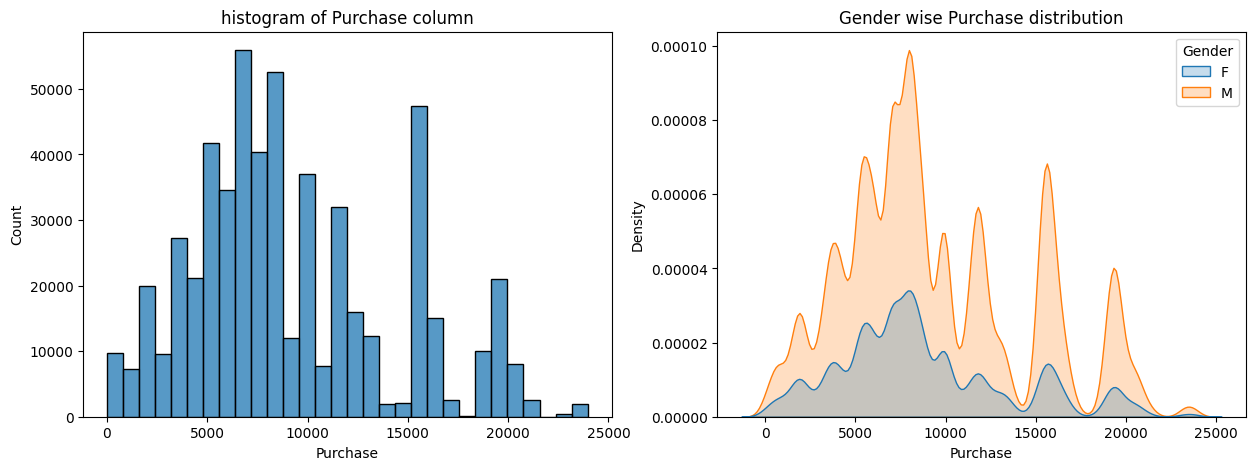

In [404]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Purchase',bins=30)
plt.title('histogram of Purchase column')

plt.subplot(1,2,2)
sns.kdeplot(data=df, x='Purchase', hue='Gender', shade=True)
plt.title('Gender wise Purchase distribution')
plt.show()

**Histogram of Purchase values shows that purchase value between 5k to 10k are the highest in number both for male and female population**

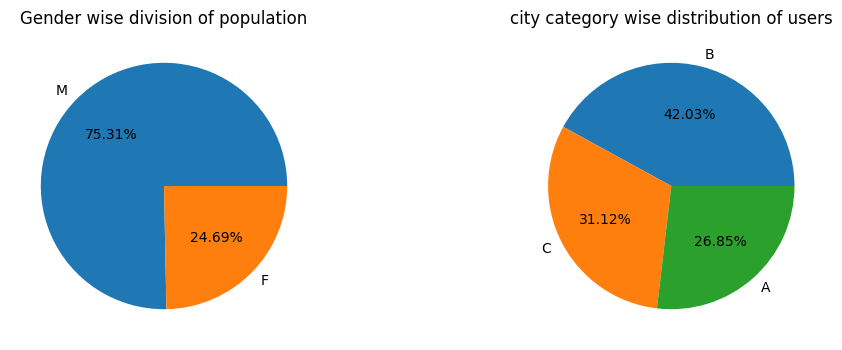

In [405]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('Gender wise division of population')

plt.subplot(1,2,2)
plt.pie(df['City_Category'].value_counts().values,labels=df['City_Category'].value_counts().index,radius=1, autopct='%1.2f%%')
plt.title('city category wise distribution of users')

plt.show()

**75.31% of user population is male and 24.69% is female. So, clearly male are purchaing more than female.**

**highest percentage of users i.e., 42.03% are from city category B**

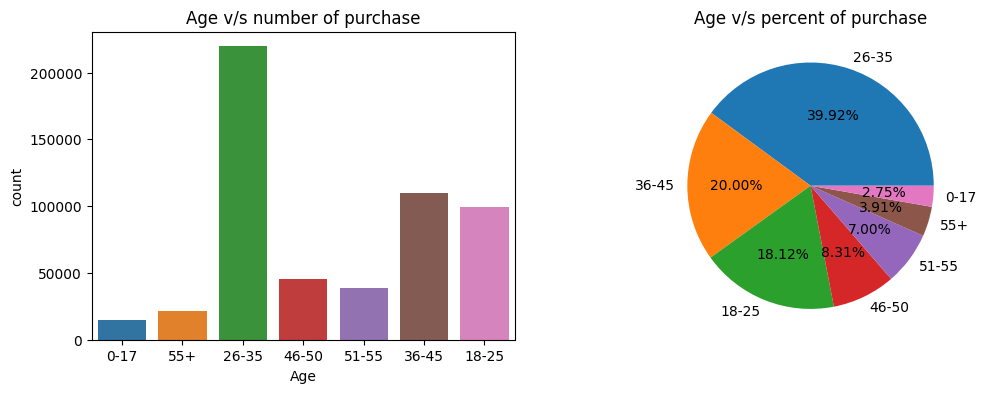

In [406]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Age')
plt.title('Age v/s number of purchase')

plt.subplot(1,2,2)
plt.pie(df['Age'].value_counts().values, labels=df['Age'].value_counts().index, autopct='%1.2f%%')
plt.title('Age v/s percent of purchase')

plt.show()

**Customers in age group 26-35 contributes maximum to the sale**

In [407]:
# replacing 0 with unmarried and 1 as married for clarity

df['Marital_Status']=df['Marital_Status'].replace(0,'Unmarried')
df['Marital_Status']=df['Marital_Status'].replace(1,'Married')

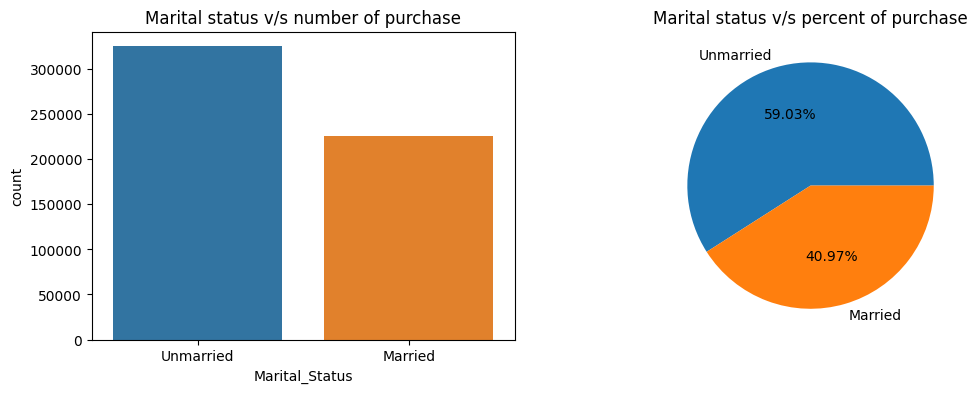

In [408]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital status v/s number of purchase')

plt.subplot(1,2,2)
plt.pie(df['Marital_Status'].value_counts().values, labels=df['Marital_Status'].value_counts().index, autopct='%1.2f%%')
plt.title('Marital status v/s percent of purchase')

plt.show()

**Unmarried customers contributes to more sales than married customers**

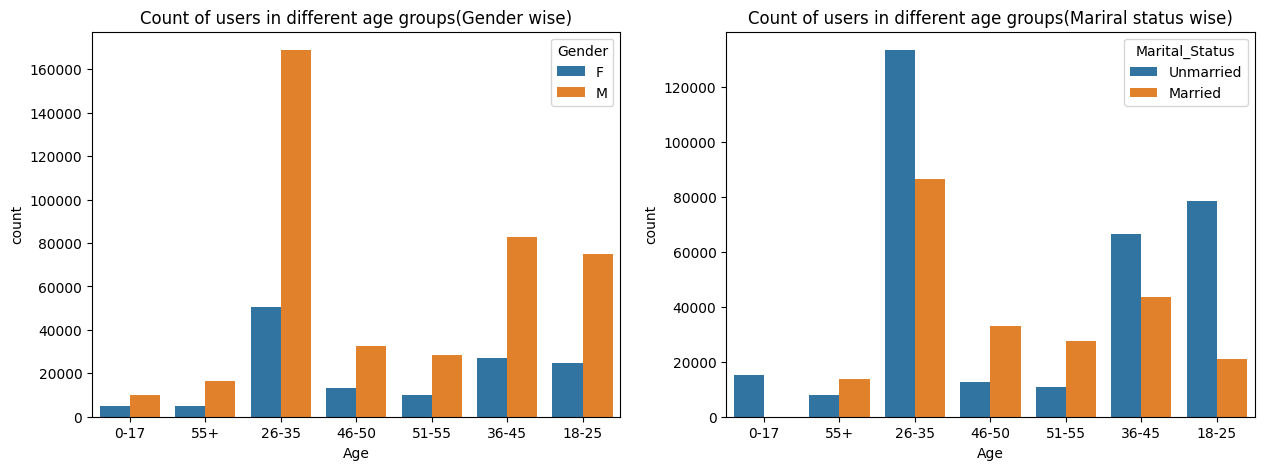

In [409]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Age', hue='Gender')
plt.title('Count of users in different age groups(Gender wise)')
plt.subplot(1,2,2)
sns.countplot(data=df, x='Age', hue='Marital_Status')
plt.title('Count of users in different age groups(Mariral status wise)')
plt.show()

**age group 26-35 have highest number of users both in male and female categories**

**age group 26-35 have highest number of users both in married and unmarried categories**

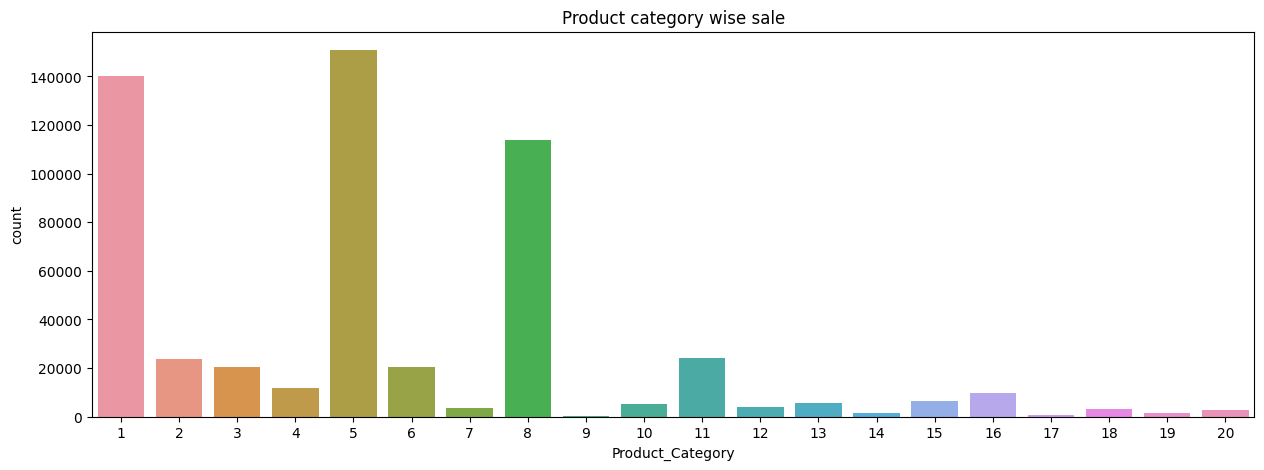

In [410]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Product_Category')
plt.title('Product category wise sale')
plt.show()

**Product category 5 is the maximum selling product category followed by product category 1 and 8**

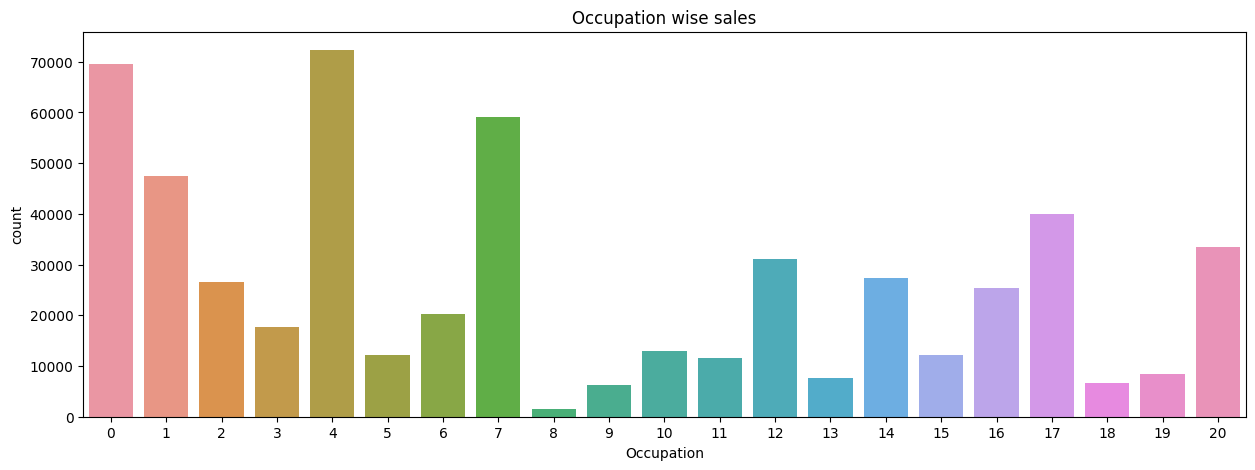

In [411]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Occupation')
plt.title('Occupation wise sales')
plt.show()

**Occupations 0 and 4 have highest purchase counts in walmart** 

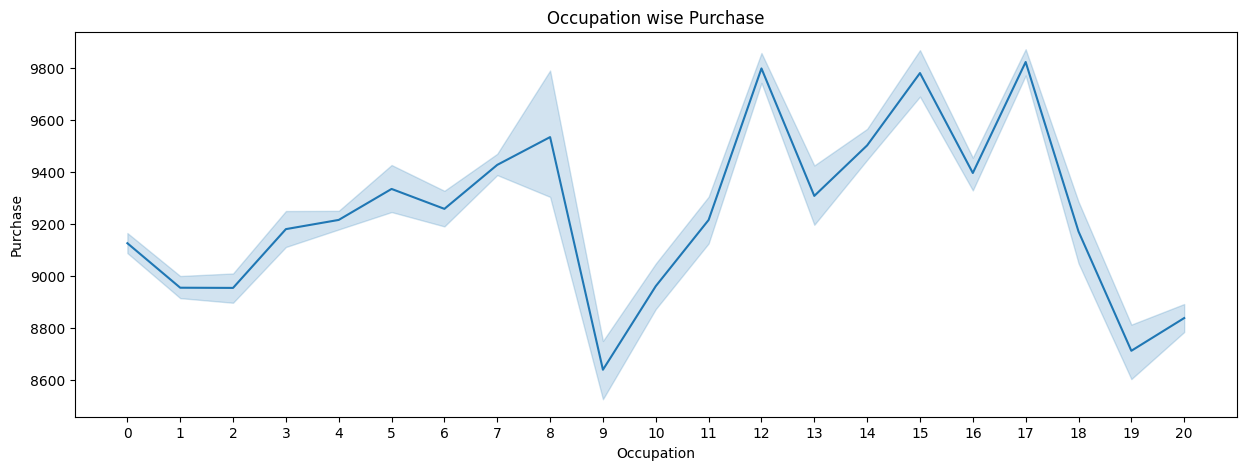

In [412]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='Occupation', y='Purchase')
plt.xticks(df['Occupation'].unique().tolist())
plt.title('Occupation wise Purchase')
plt.show()

**Maximum purchase amount is spent by Occupations 18 followed by 8,12 and 15**

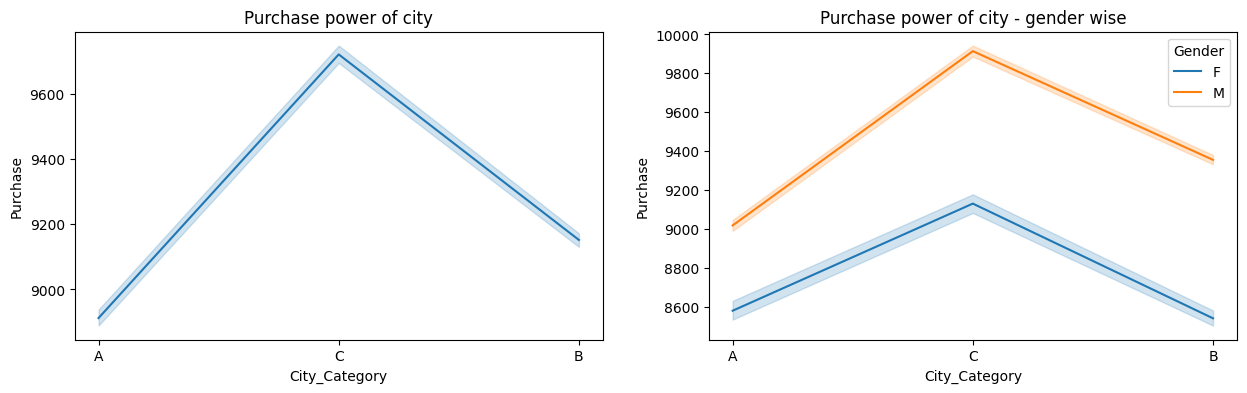

In [413]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(df,x='City_Category', y='Purchase')
plt.title('Purchase power of city')

plt.subplot(1,2,2)
sns.lineplot(df,x='City_Category', y='Purchase', hue='Gender')
plt.title('Purchase power of city - gender wise')
plt.show()

**Earlier, we saw that city category B has maximum number of users. But purchase amount wise, we can see that city C is making the maximum amount for both male and female.**

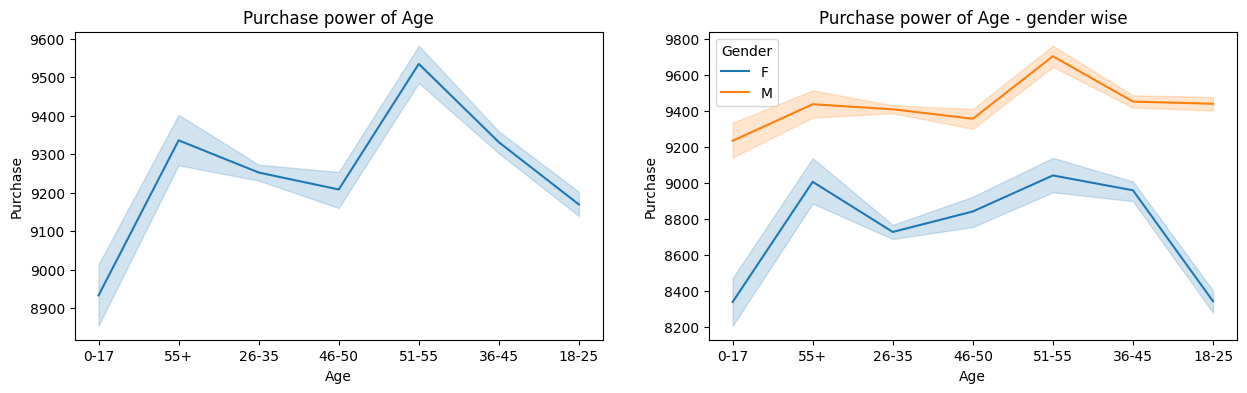

In [414]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(df,x='Age', y='Purchase')
plt.title('Purchase power of Age')

plt.subplot(1,2,2)
sns.lineplot(df,x='Age', y='Purchase', hue='Gender')
plt.title('Purchase power of Age - gender wise')
plt.show()

**Age group of 55+ and 51-55 are contributing maximum to purchase amount/total sales in walmart. But if we see Gender wise, 55+ age group in MALE customers is giving maximum purchase amount and age group 51-55 in FEMALE customers is giving maximum purchase amount**

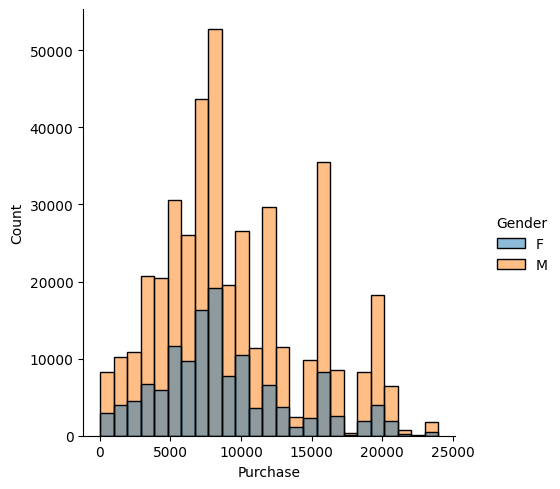

In [415]:
sns.displot(data = df, x = 'Purchase', hue = 'Gender',bins = 25)
plt.show()

**Male population spending maximum in purchase range 5k to 10k**

**within women population, they are also spending maximum in purchase range 5k to 10k**

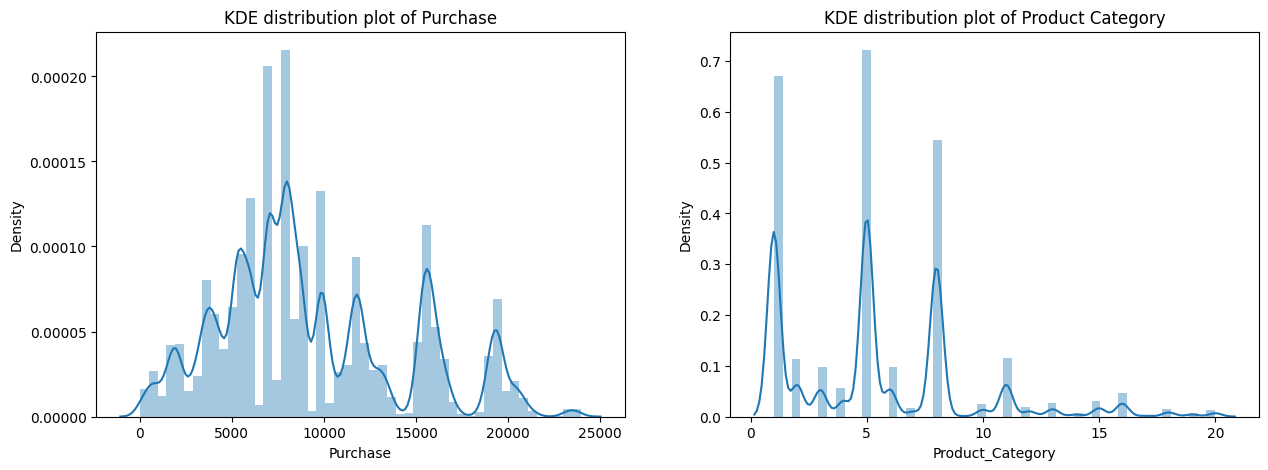

In [416]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Purchase'], kde=True, hist=True)
plt.title('KDE distribution plot of Purchase')
plt.subplot(1,2,2)
sns.distplot(df['Product_Category'], kde=True, hist=True)
plt.title('KDE distribution plot of Product Category')
plt.show()

**Maximum density of orders is for product category 5 followed by 1,8**

# Correlation

In [417]:
df.corr(numeric_only=True)

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.003825,0.004716
Occupation,-0.023971,1.000000,-0.007618,0.020833
Product_Category,0.003825,-0.007618,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.343703,1.000000


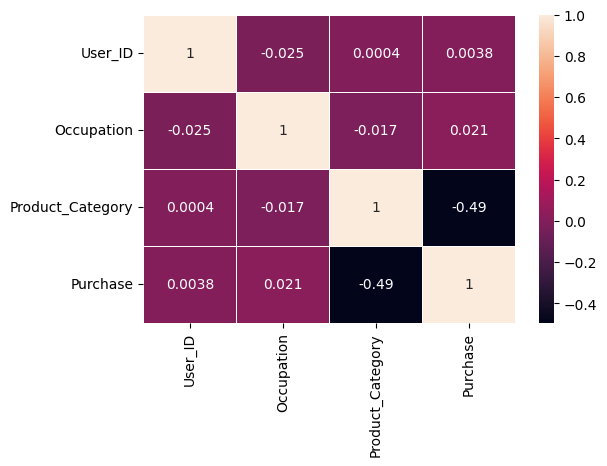

In [482]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth=.5)
plt.show()

**There is no significant correlation between the columns**

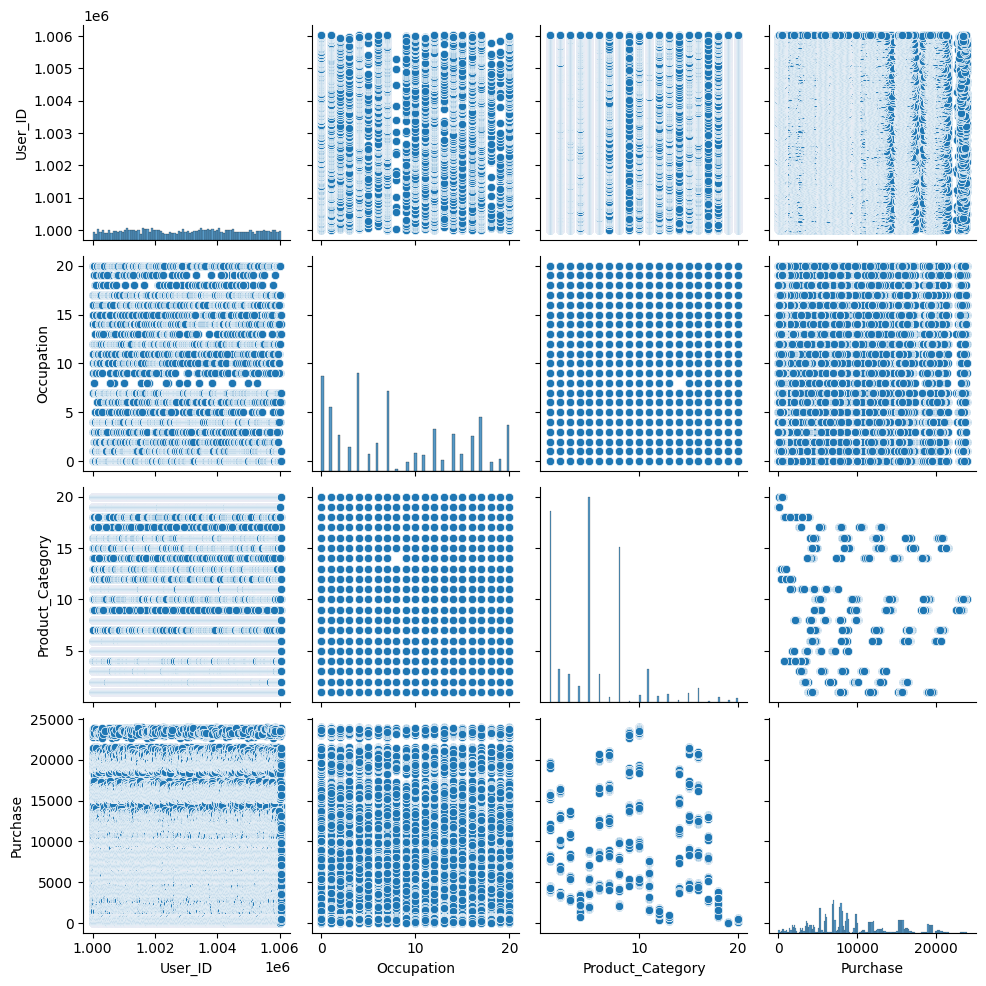

In [419]:
sns.pairplot(df)

**There is no significant correlation exists between the columns**

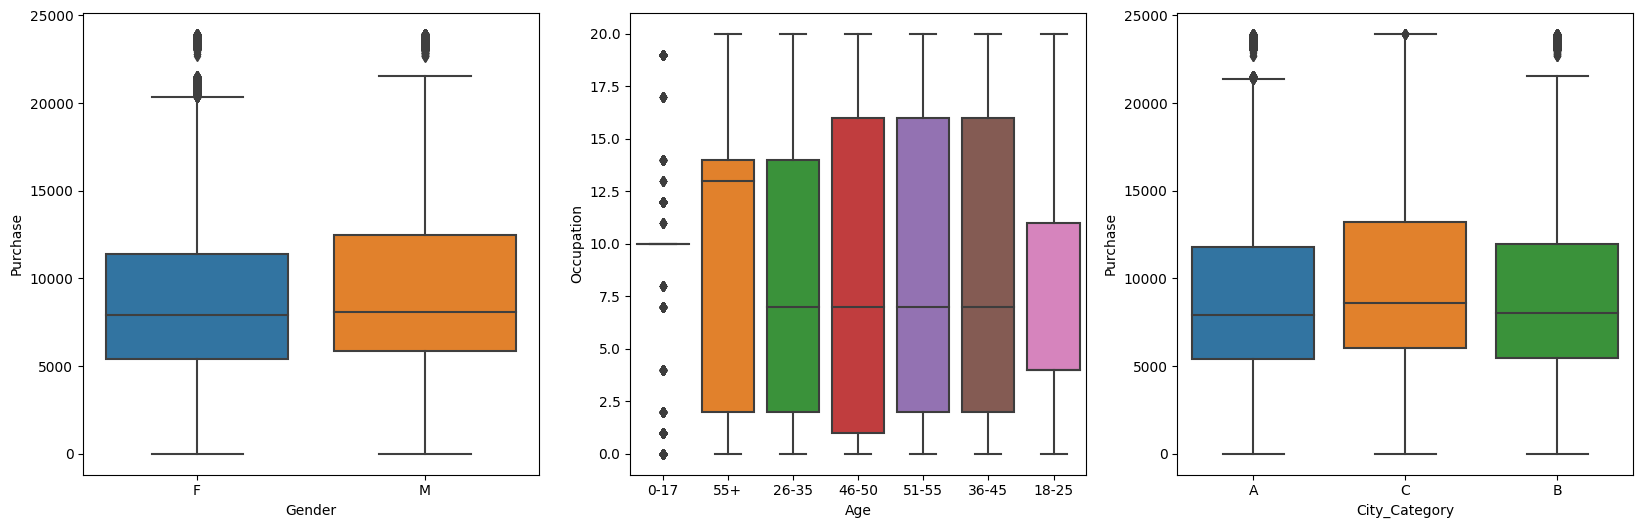

In [420]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='Gender',y='Purchase')
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Age', y='Occupation')
plt.subplot(1,3,3)
sns.boxplot(data=df,x='City_Category', y='Purchase')
plt.show()

**we can see that outliers exists in dataset**

# Outlier removal

# Outlier removal using IQR method

In [421]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['User_ID', 'Occupation', 'Product_Category', 'Purchase'], dtype='object')

In [422]:
df_out = df.copy()
for col in numerical_columns:
    q1 = df_out[col].quantile(0.25)
    q2 = df_out[col].quantile(0.75)
    iqr = q2-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q2+(1.5*iqr)
    
    df_out = df_out[(df_out[col]>=lower_bound) & (df_out[col]<=upper_bound)]
    

In [423]:
df_out.shape

(543210, 10)

In [424]:
df_out.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.432100e+05,543210.000000,543210.000000,543210.000000
mean,1.003028e+06,8.073542,5.269618,9263.453447
std,1.727223e+03,6.523237,3.738354,4894.351613
min,1.000001e+06,0.000000,1.000000,185.000000
25%,1.001516e+06,2.000000,1.000000,5858.000000
50%,1.003075e+06,7.000000,5.000000,8052.000000
75%,1.004477e+06,14.000000,8.000000,12036.000000
max,1.006040e+06,20.000000,18.000000,21378.000000


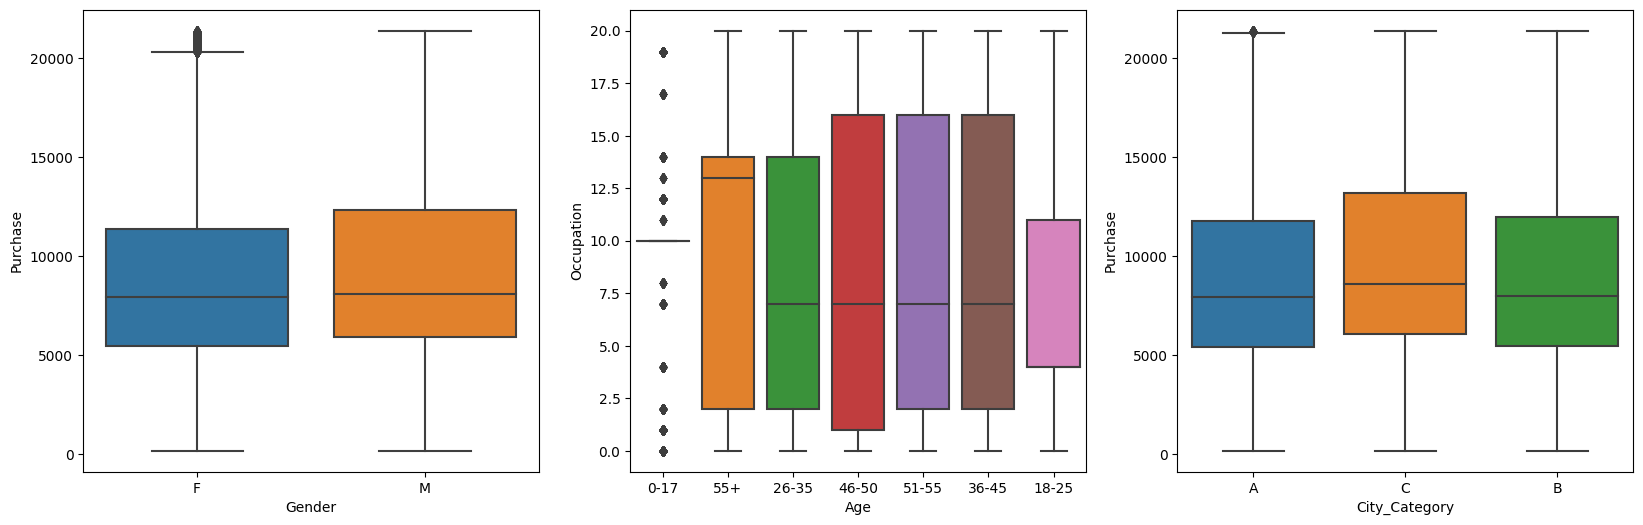

In [425]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(data=df_out, x='Gender',y='Purchase')
plt.subplot(1,3,2)
sns.boxplot(data=df_out,x='Age', y='Occupation')
plt.subplot(1,3,3)
sns.boxplot(data=df_out,x='City_Category', y='Purchase')
plt.show()

**not much outliers removed**

# Outlier removal using z-score 

In [426]:
df_z = df_out.copy()
df_z.shape


(543210, 10)

In [427]:
for col in numerical_columns:
    mean = df_z[col].mean()
    std = df_z[col].std()
    # Calculate the Z-scores for each data point
    df_z['z_score'] = (df_z[col]-mean)/std
    # set threshold (setting it to 3)
    threshold = 2
    df_z = df_z[abs(df_z['z_score'])<=threshold]
    df_z.drop(columns='z_score', inplace=True)    

    

In [428]:
df_z.shape

(479445, 10)

In [429]:
df_z.describe()

,User_ID,Occupation,Product_Category,Purchase
count,4.794450e+05,479445.00000,479445.000000,479445.000000
mean,1.003024e+06,8.04505,4.940258,8416.721745
std,1.728587e+03,6.53145,2.980963,3919.108226
min,1.000001e+06,0.00000,1.000000,342.000000
25%,1.001505e+06,2.00000,2.000000,5462.000000
50%,1.003067e+06,7.00000,5.000000,7901.000000
75%,1.004478e+06,14.00000,8.000000,11046.000000
max,1.006040e+06,20.00000,12.000000,18709.000000


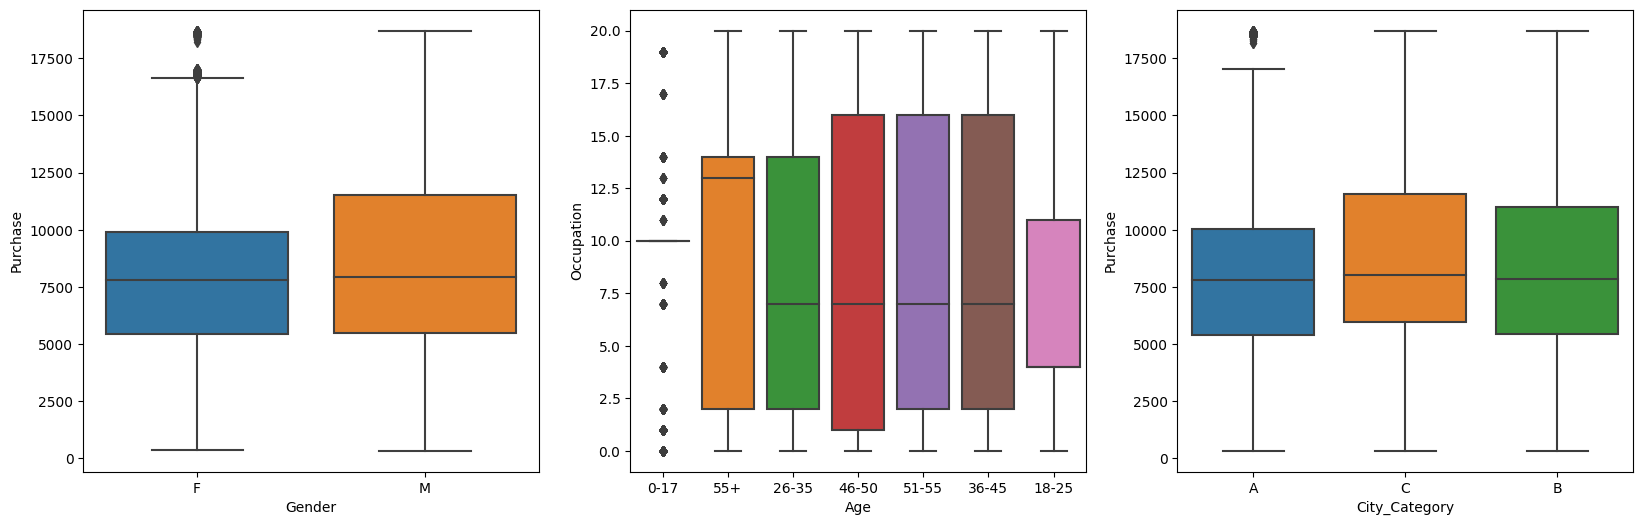

In [430]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(data=df_z, x='Gender',y='Purchase')
plt.subplot(1,3,2)
sns.boxplot(data=df_z,x='Age', y='Occupation')
plt.subplot(1,3,3)
sns.boxplot(data=df_z,x='City_Category', y='Purchase')
plt.show()

**we can see that outliers are reduced. Mean and median values are also closer than before**

# Confidence intervals and distribution of the mean of the purchase done by female and male customers 

In [431]:
df = df_z.copy()

In [432]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [433]:
df.groupby(['Gender'])['Purchase'].sum()

Gender
F     975645232
M    3059709925
Name: Purchase, dtype: int64

**Male customers are conributing more compared to female customers towards total sales**

In [434]:
df.groupby(['Gender'])['Purchase'].mean()

Gender
F    8050.808113
M    8540.497029
Name: Purchase, dtype: float64

In [435]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,121186.0,8050.808113,3719.695310,347.0,5423.0,7807.0,9913.0,18709.0
M,358259.0,8540.497029,3976.695454,342.0,5478.0,7935.0,11517.0,18708.0


In [436]:
female_cust = df[df['Gender']=='F']
male_cust = df[df['Gender']=='M']

total_female = len(female_cust)
total_male = len(male_cust)

female_cust_mean = female_cust['Purchase'].mean()
female_cust_std = female_cust['Purchase'].std()

male_cust_mean = male_cust['Purchase'].mean()
male_cust_std = male_cust['Purchase'].std()

confidence_interval = 0.95

In [437]:
female_cust_mean, male_cust_mean

(8050.808113148383, 8540.49702868595)

In [438]:
female_cust_std,male_cust_std

(3719.6953097276323, 3976.695454161033)

In [439]:
z_score = norm.ppf(1 - (1 - confidence_interval) / 2)
margin_of_error_female = z_score * (female_cust_std / np.sqrt(total_female))
margin_of_error_male = z_score * (male_cust_std / np.sqrt(total_male))

In [440]:
lower_bound_female = female_cust_mean-margin_of_error_female
upper_bound_female = female_cust_mean+margin_of_error_female

lower_bound_male = male_cust_mean - margin_of_error_male
upper_bound_male = male_cust_mean + margin_of_error_male

print("Interval for Population Female average spending under 95% confidence interval:", (lower_bound_female, upper_bound_female))
print("Interval for Population Male average spending under 95% confidence interval:", (lower_bound_male, upper_bound_male))

Interval for Population Female average spending under 95% confidence interval: (8029.865578980216, 8071.75064731655)
Interval for Population Male average spending under 95% confidence interval: (8527.475203247614, 8553.518854124286)


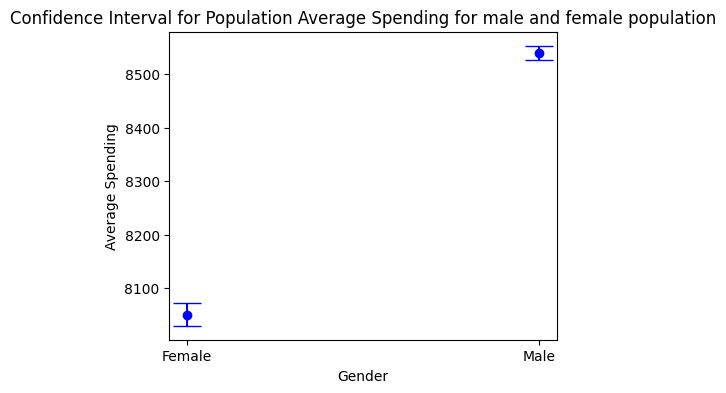

In [441]:
confidence_interval_female = (lower_bound_female, upper_bound_female)  
confidence_interval_male = (lower_bound_male, upper_bound_male)    

# Create a DataFrame with the confidence intervals
data = pd.DataFrame({'Gender': ['Female', 'Male'],
                     'Lower Bound': [confidence_interval_female[0], confidence_interval_male[0]],
                     'Upper Bound': [confidence_interval_female[1], confidence_interval_male[1]]})

data['Y'] = data[['Lower Bound', 'Upper Bound']].mean(axis=1)

data['Error'] = (data['Upper Bound'] - data['Lower Bound']) / 2

plt.figure(figsize=(5, 4))
plt.errorbar(data['Gender'], data['Y'], yerr=data['Error'], fmt='o', capsize=10, color='blue')

plt.xlabel('Gender')
plt.ylabel('Average Spending')
plt.title('Confidence Interval for Population Average Spending for male and female population')
    
plt.show()


In [442]:
df.sample(300).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,84.0,7979.750000,3761.206115,1424.0,5445.50,7827.0,9858.5,16459.0
M,216.0,8158.087963,3794.139646,1408.0,5435.25,7837.5,10916.5,16818.0


In [443]:
df_sample_male = df[df['Gender'] == 'M']
male_purchase = df_sample_male['Purchase']
df_sample_fem = df[df['Gender']=='F']
fem_purchase = df_sample_fem['Purchase']


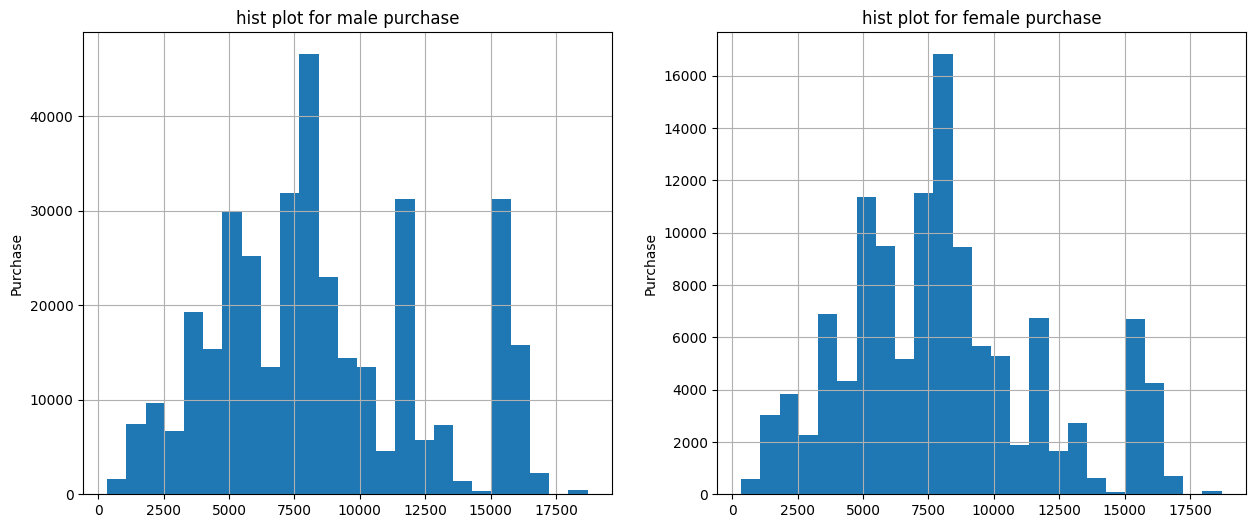

In [444]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
male_purchase.hist(bins=25)
plt.ylabel('Purchase')
plt.title('hist plot for male purchase')

plt.subplot(1,2,2)
fem_purchase.hist(bins=25)
plt.ylabel('Purchase')
plt.title('hist plot for female purchase')
plt.show()

**purchase disribution for male and female is not following normal distribution.**

**Applying CLT to get the sampling distribution of sample means to get a Normal Distribution out of it.**

# CLT for male and female customers

In [445]:
male_purchase.mean(),fem_purchase.mean()

(8540.49702868595, 8050.808113148383)

# Bootstrapping

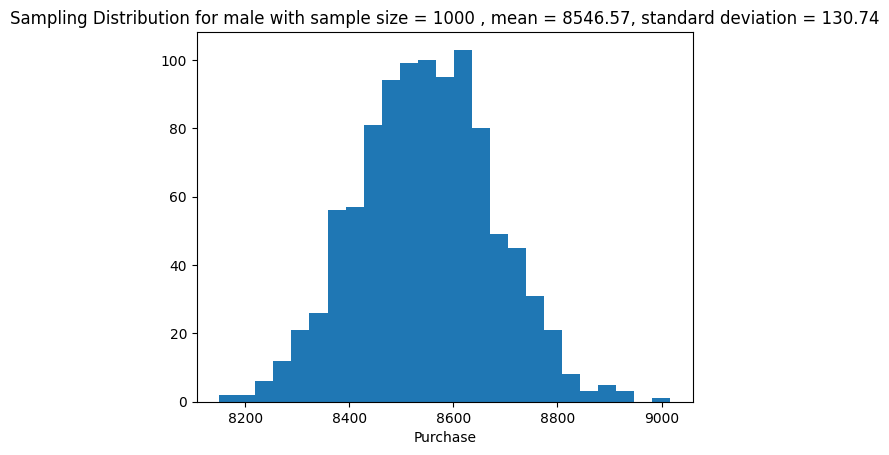

In [446]:
m = 1000
sample = male_purchase 
size = 1000 
means_male = np.empty(m)

for i in range(m):
    bs_sample = np.random.choice(sample, size = size)
    means_male[i] = np.mean(bs_sample)
plt.figure()
plt.hist(means_male, bins = 25)
plt.title(f"Sampling Distribution for male with sample size = 1000 , mean = {np.round(np.mean(means_male),2)}, standard deviation = {np.round(np.std(means_male),2)}")
plt.xlabel('Purchase')
plt.show()


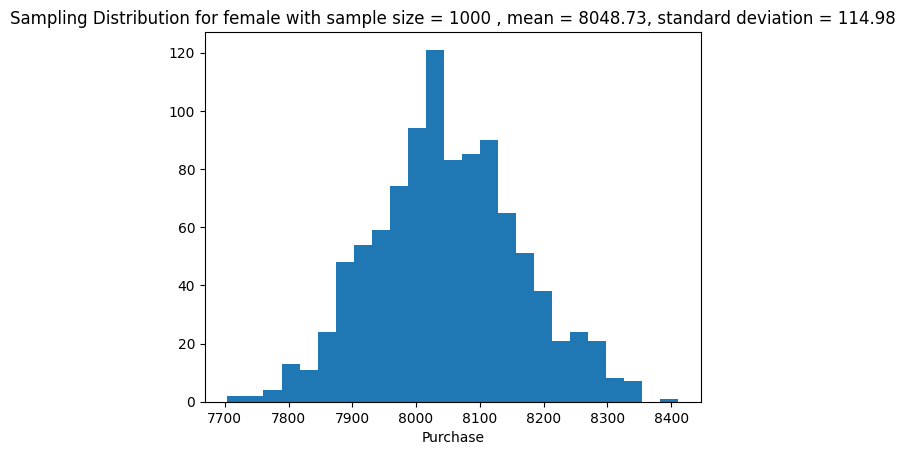

In [447]:
m = 1000
sample = fem_purchase 
size = 1000 
means_fem = np.empty(m)

for i in range(m):
    bs_sample = np.random.choice(sample, size = size)
    means_fem[i] = np.mean(bs_sample)
plt.figure()
plt.hist(means_fem, bins = 25)
plt.title(f"Sampling Distribution for female with sample size = 1000 , mean = {np.round(np.mean(means_fem),2)}, standard deviation = {np.round(np.std(means_fem),2)}")
plt.xlabel('Purchase')
plt.show()

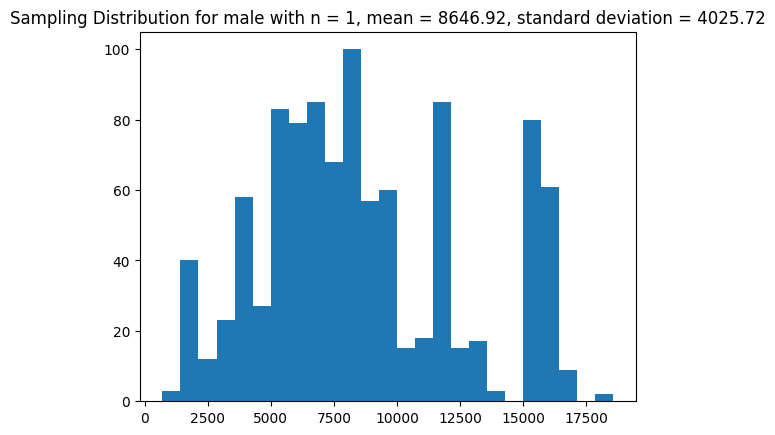

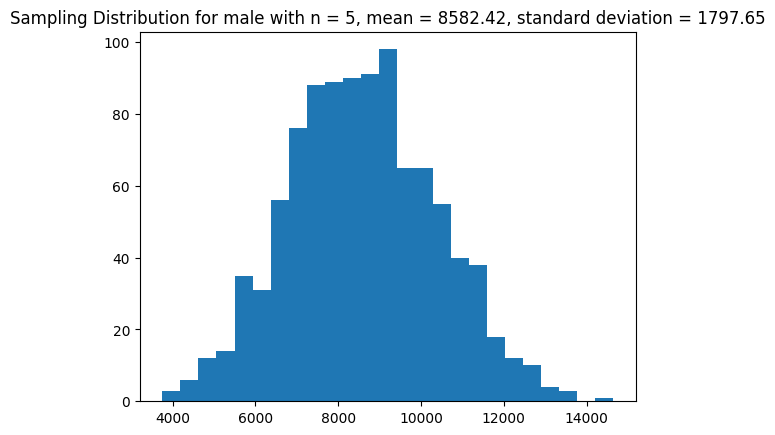

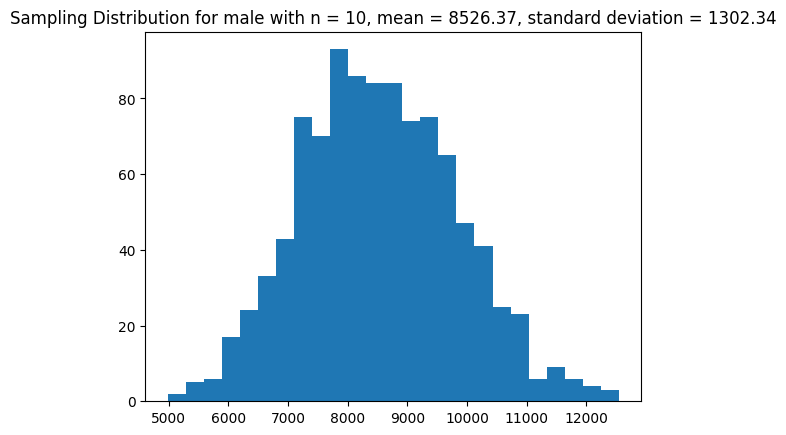

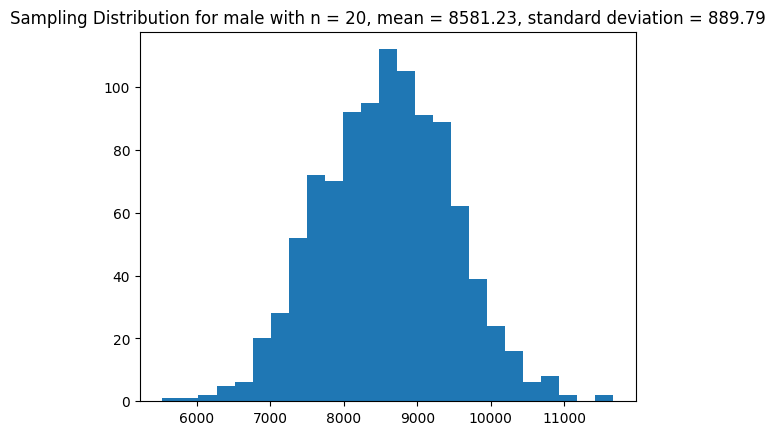

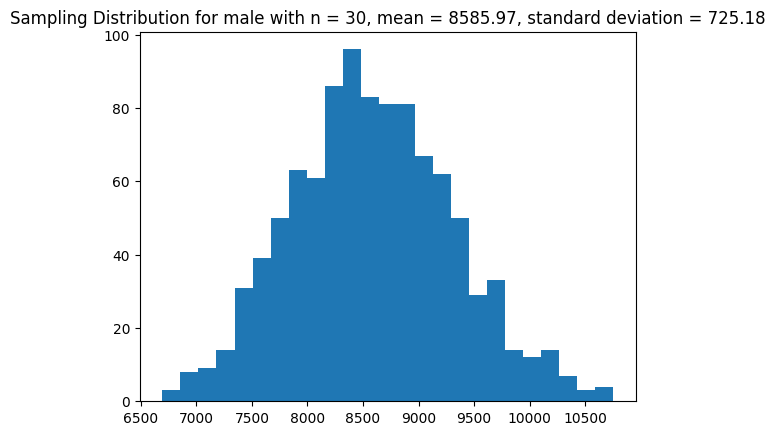

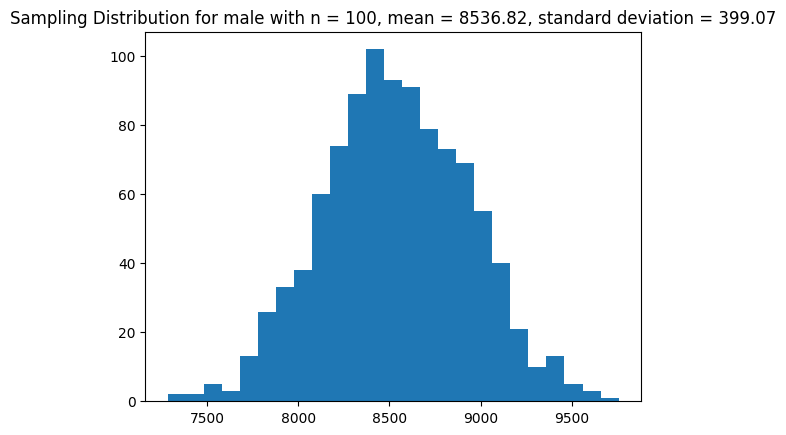

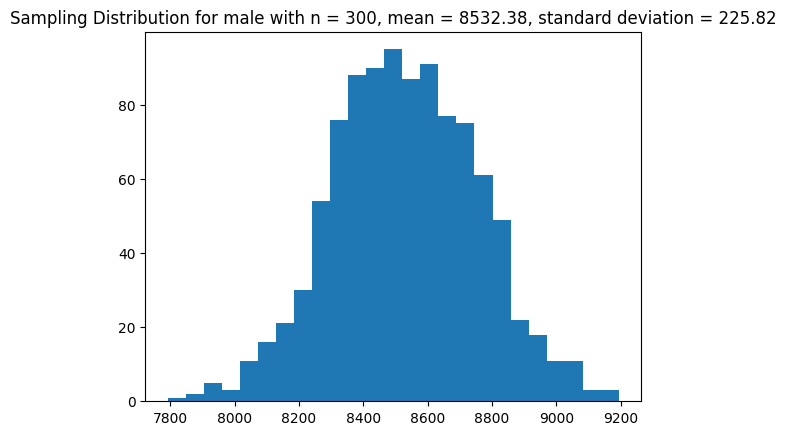

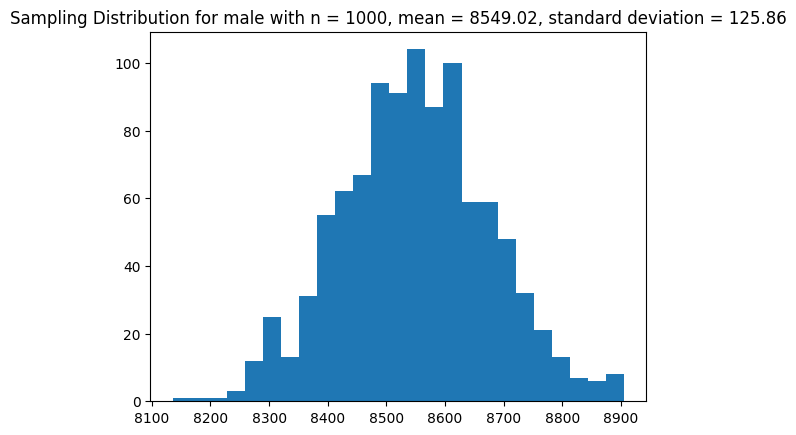

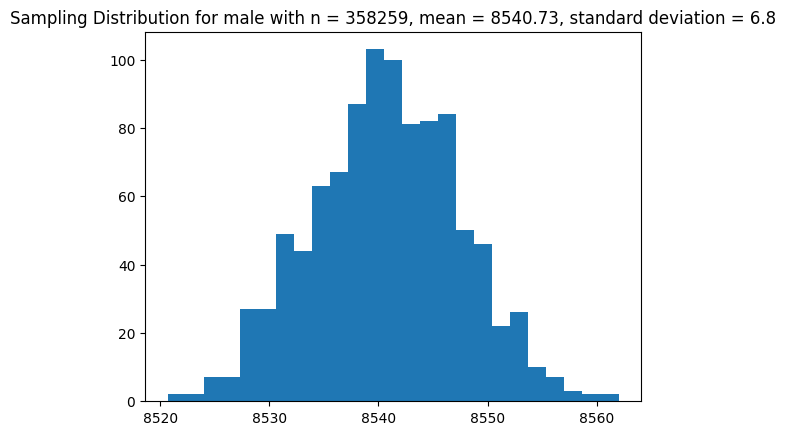

In [448]:
m = 1000 # lenth of "sampling distribution of sample means"
sample = male_purchase
size_list = [1, 5, 10, 20, 30, 100,300, 1000, len(male_purchase)]


for n in size_list:
    means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        means_n[i] = np.mean(bs_sample_n)
    plt.figure()
    plt.hist(means_n, bins = 25)
    plt.title(f"Sampling Distribution for male with n = {n}, mean = {np.round(np.mean(means_n),2)}, standard deviation = {np.round(np.std(means_n),2)}")
    plt.show()

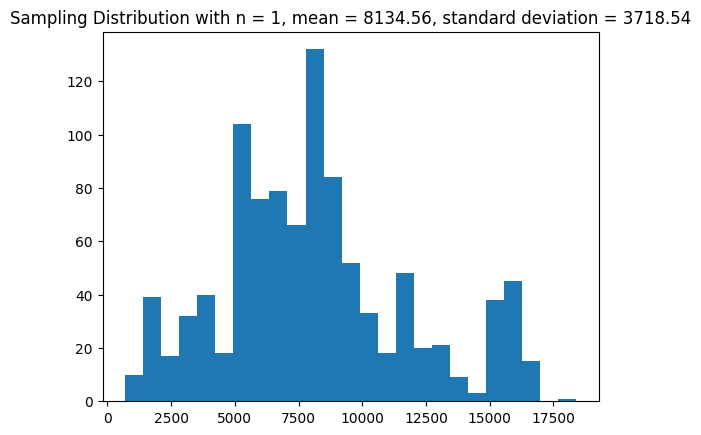

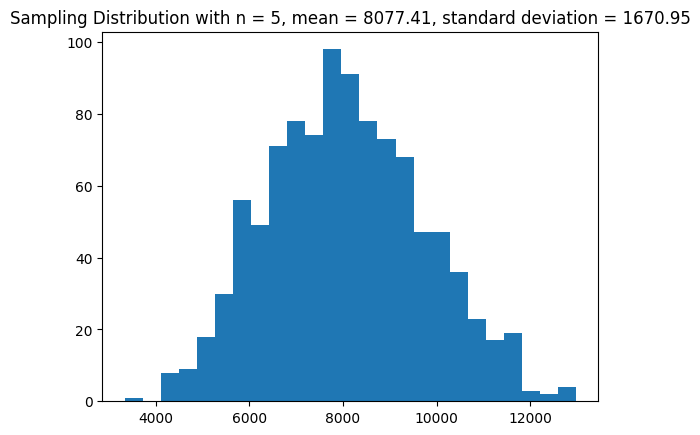

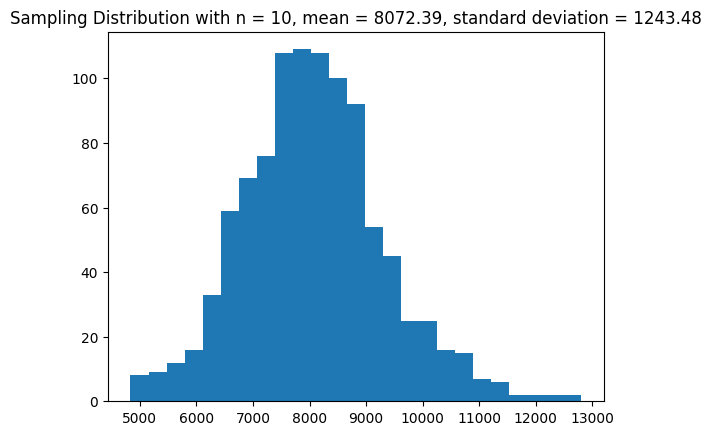

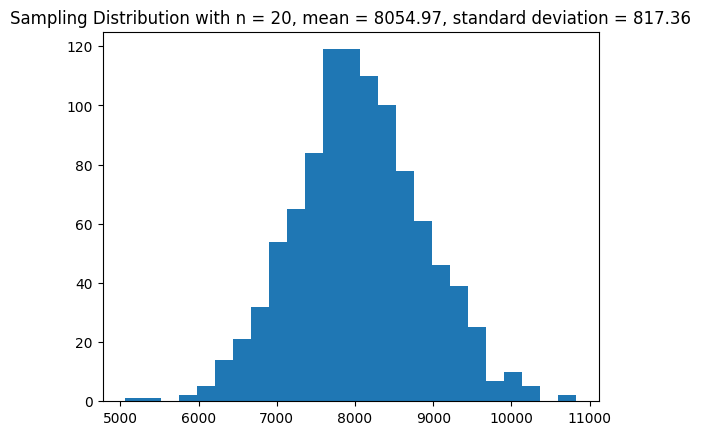

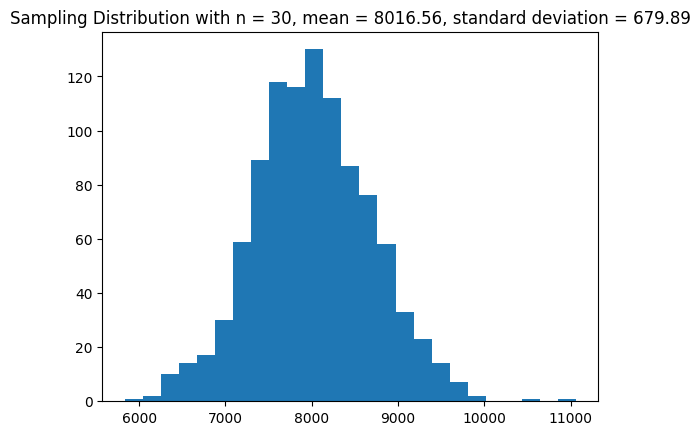

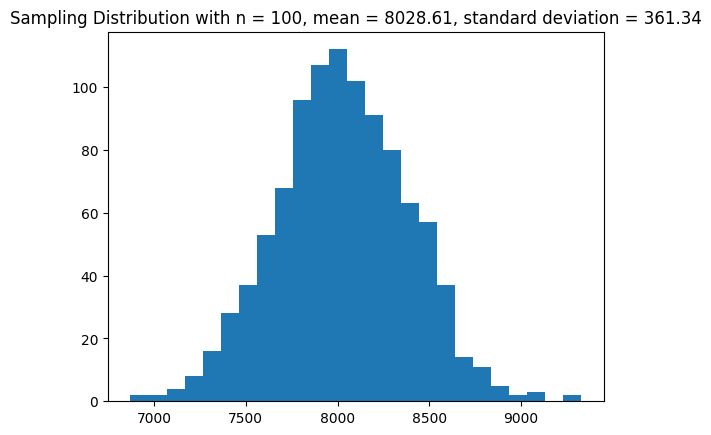

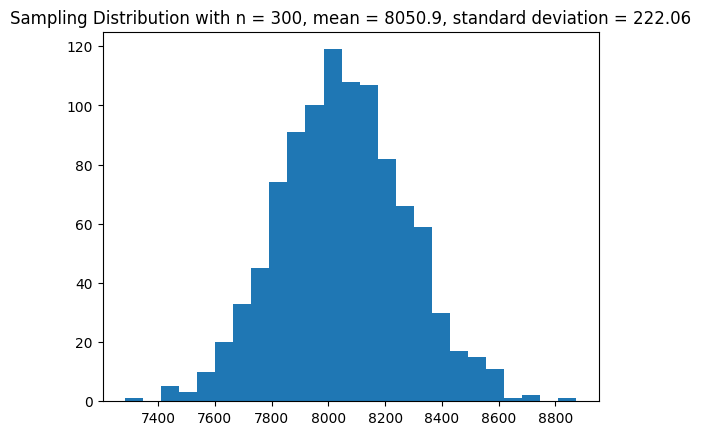

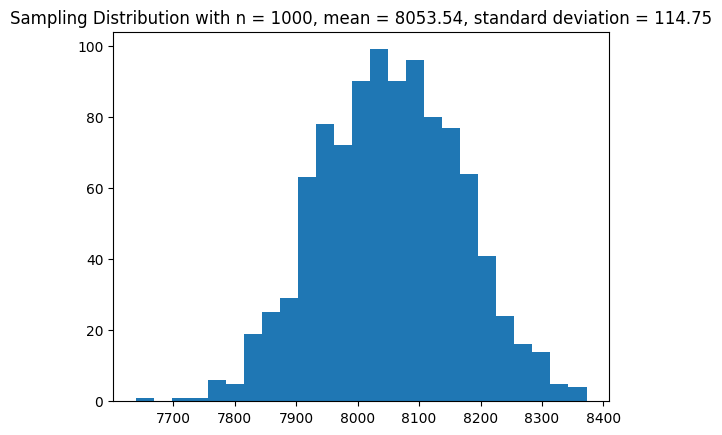

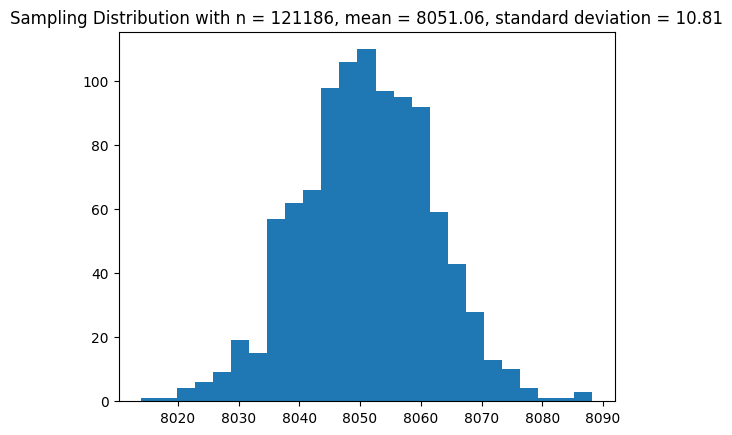

In [449]:
m = 1000 # lenth of "sampling distribution of sample means"
sample = fem_purchase
size_list = [1, 5, 10, 20, 30, 100,300, 1000, len(fem_purchase)]


for n in size_list:
    means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        means_n[i] = np.mean(bs_sample_n)
    plt.figure()
    plt.hist(means_n, bins = 25)
    plt.title(f"Sampling Distribution with n = {n}, mean = {np.round(np.mean(means_n),2)}, standard deviation = {np.round(np.std(means_n),2)}")
    plt.show()

In [450]:
m = 1000
sample = male_purchase
size_list = [1, 5, 10, 20, 30, 100, 300, 1000, len(male_purchase)]


for n in size_list:
    means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        means_n[i] = np.mean(bs_sample_n)
    print(f"sample size = {n}, mean={np.round(np.mean(means_n),2)} , Standard Error = {np.round((np.std(sample)/np.sqrt(n)),2)}")

sample size = 1, mean=8619.64 , Standard Error = 3976.69
sample size = 5, mean=8543.39 , Standard Error = 1778.43
sample size = 10, mean=8520.54 , Standard Error = 1257.54
sample size = 20, mean=8583.31 , Standard Error = 889.21
sample size = 30, mean=8545.96 , Standard Error = 726.04
sample size = 100, mean=8515.25 , Standard Error = 397.67
sample size = 300, mean=8540.74 , Standard Error = 229.59
sample size = 1000, mean=8541.29 , Standard Error = 125.75
sample size = 358259, mean=8540.19 , Standard Error = 6.64


In [451]:
m = 1000
sample = fem_purchase
size_list = [1, 5, 10, 20, 30, 100, 300, 1000, len(fem_purchase)]


for n in size_list:
    means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        means_n[i] = np.mean(bs_sample_n)
    print(f"sample size = {n},mean={np.round(np.mean(means_n),2)}, Standard Error = {np.round((np.std(sample)/np.sqrt(n)),2)}")

sample size = 1,mean=7963.75, Standard Error = 3719.68
sample size = 5,mean=8031.76, Standard Error = 1663.49
sample size = 10,mean=8015.4, Standard Error = 1176.27
sample size = 20,mean=8076.18, Standard Error = 831.75
sample size = 30,mean=8078.8, Standard Error = 679.12
sample size = 100,mean=8043.44, Standard Error = 371.97
sample size = 300,mean=8047.09, Standard Error = 214.76
sample size = 1000,mean=8046.81, Standard Error = 117.63
sample size = 121186,mean=8050.56, Standard Error = 10.69


**As sample size increases, Standard error decreases.**

In [452]:
Confidence_95 = np.percentile(means_male, 97.5) - np.percentile(means_male, 2.5)
print(f"The avg mean for male population purchasing within 95% area (confidence) is {np.percentile(means_male, 2.5), np.percentile(means_male, 97.5) }")

The avg mean for male population purchasing within 95% area (confidence) is (8299.4877, 8789.444325)


In [453]:
Confidence_95 = np.percentile(means_fem, 97.5) - np.percentile(means_fem, 2.5)
print(f"The avg mean for female population purchasing within 95% area (confidence) is {np.percentile(means_fem, 2.5), np.percentile(means_fem, 97.5) }")

The avg mean for female population purchasing within 95% area (confidence) is (7832.901425, 8280.5901)


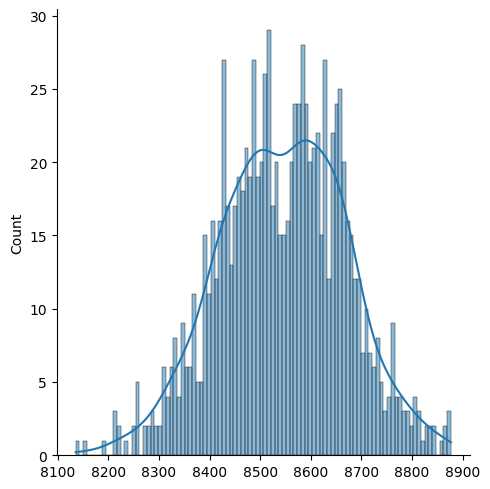

In [454]:
male_purchase_mean = [df[df['Gender'] == 'M']['Purchase'].sample(1000).mean() for i in range(1000)]
sns.displot(male_purchase_mean, bins = 100, kde = True)
plt.show()

In [455]:
pd.Series(male_purchase_mean).mean(), pd.Series(male_purchase_mean).std()

(8544.581059999999, 124.8106567647348)

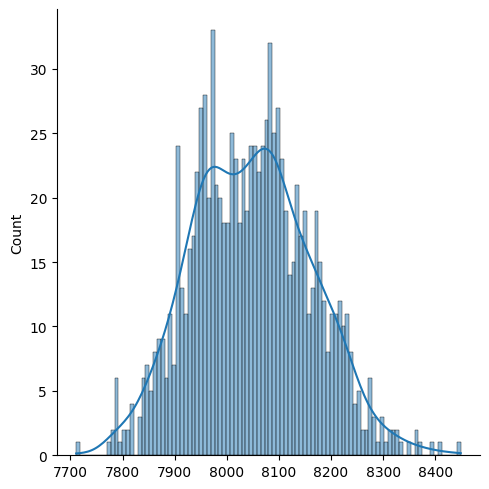

In [456]:
fem_purchase_mean = [df[df['Gender'] == 'F']['Purchase'].sample(1000).mean() for i in range(1000)]
sns.displot(fem_purchase_mean, bins = 100, kde = True)
plt.show()

In [457]:
pd.Series(fem_purchase_mean).mean(), pd.Series(fem_purchase_mean).std()

(8048.018844, 114.23075254141435)

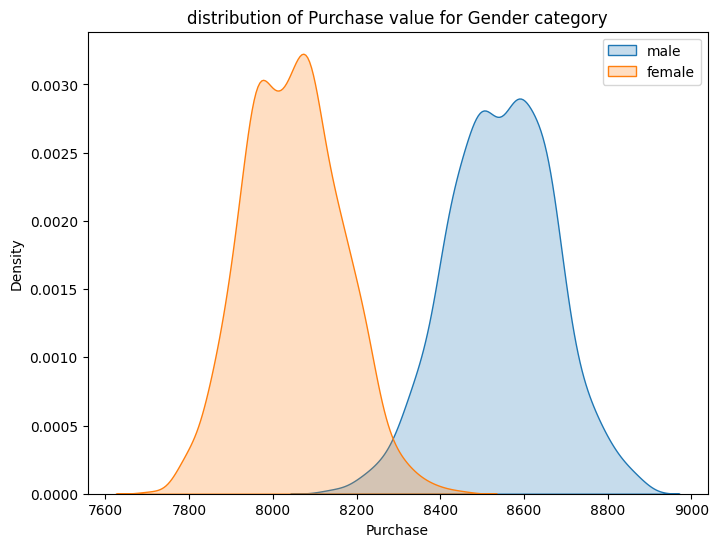

In [483]:
# male: mean=8537.65 , Standard Error = 124
# female: mean=8052.03, Standard Error = 120.64
mu_male = 8537.65
mu_female = 8052.03
sd_male = 124
sd_female = 120.64


plt.figure(figsize=(8,6))
sns.kdeplot(male_purchase_mean,shade=True, label='male')
sns.kdeplot(fem_purchase_mean,shade=True, label='female')
plt.xlabel('Purchase')
plt.legend()
plt.title('distribution of Purchase value for Gender category')
plt.show()

**there is no significance overlapping between male and female purchase. Male purchase amount is higher than female purchase amount. The small overlap suggests that the data points for the different gender categories are concentrated in distinct regions of the feature space. So, there is no pattern on which walmart can focus to improve sales based on male and female purchase amount**

In [459]:
female_customers = df[df['Gender'] == 'F']
male_customers = df[df['Gender'] == 'M']

# Define the desired confidence interval and sample sizes
confidence_levels = [0.90, 0.95, 0.99]
sample_sizes = [30, 50, 100, 200]

In [486]:
# Function to calculate the confidence interval 
def calculate_confidence_interval(data, sample_size, confidence_level):
    sample_means = []
    num_samples = 200  # Number of samples to generate for each sample size

    for _ in range(num_samples):
        sample = data.sample(sample_size, replace=False)
        sample_mean = sample['Purchase'].mean()
        sample_means.append(sample_mean)

    # Calculate the standard error of the mean
    standard_error = np.std(sample_means) / np.sqrt(sample_size)

    # Calculate the Z-Score 
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate the confidence interval
    lower_bound = np.mean(sample_means) - z_score * standard_error
    upper_bound = np.mean(sample_means) + z_score * standard_error
    mean = np.mean(sample_means)

    return lower_bound, upper_bound, mean

In [489]:
# Generate confidence intervals for different sample sizes and confidence intervals
results = []
for confidence_level in confidence_levels:
    for sample_size in sample_sizes:
        lower_bound_female, upper_bound_female,fem_mean_val = calculate_confidence_interval(female_customers, sample_size, confidence_level)
        lower_bound_male, upper_bound_male, male_mean_val = calculate_confidence_interval(male_customers, sample_size, confidence_level)
        results.append({'Gender': 'Female', 'Sample Size': sample_size, 'Confidence interval': confidence_level,
                        'Lower Bound': lower_bound_female, 'Upper Bound': upper_bound_female, 'Mean': fem_mean_val})
        results.append({'Gender': 'Male', 'Sample Size': sample_size, 'Confidence interval': confidence_level,
                        'Lower Bound': lower_bound_male, 'Upper Bound': upper_bound_male, 'Mean': male_mean_val})

results_df = pd.DataFrame(results)

In [490]:
results_df

,Gender,Sample Size,Confidence interval,Lower Bound,Upper Bound,Mean
0,Female,30,0.90,7787.236324,8200.346676,7993.791500
1,Male,30,0.90,8320.540014,8748.816320,8534.678167
2,Female,50,0.90,7944.200220,8178.781180,8061.490700
3,Male,50,0.90,8416.663332,8656.554868,8536.609100
4,Female,100,0.90,7970.820178,8091.376622,8031.098400
5,Male,100,0.90,8461.585322,8590.378678,8525.982000
6,Female,200,0.90,8015.983396,8076.123504,8046.053450
7,Male,200,0.90,8514.344341,8583.343859,8548.844100
8,Female,30,0.95,7787.658447,8297.955553,8042.807000
9,Male,30,0.95,8335.200289,8863.375711,8599.288000


#  CLT of marital status

In [464]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [465]:
df['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [466]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
Married      8426.641587
Unmarried    8409.862252
Name: Purchase, dtype: float64

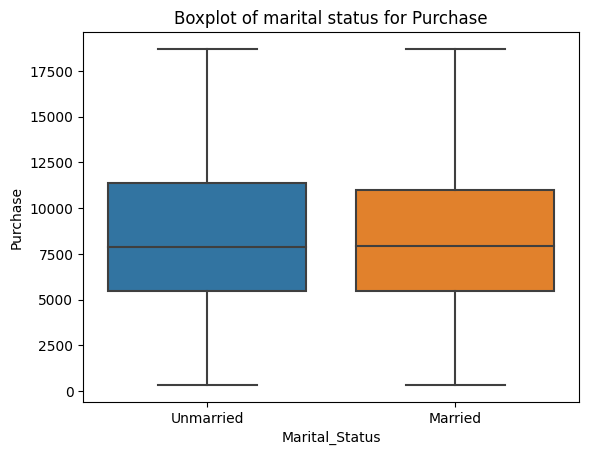

In [467]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df)
plt.title('Boxplot of marital status for Purchase')
plt.show()

**Although, Unmarried customers have more purchasing power but we can see that mean purchase amount for both married and unmarried customers is almost same**

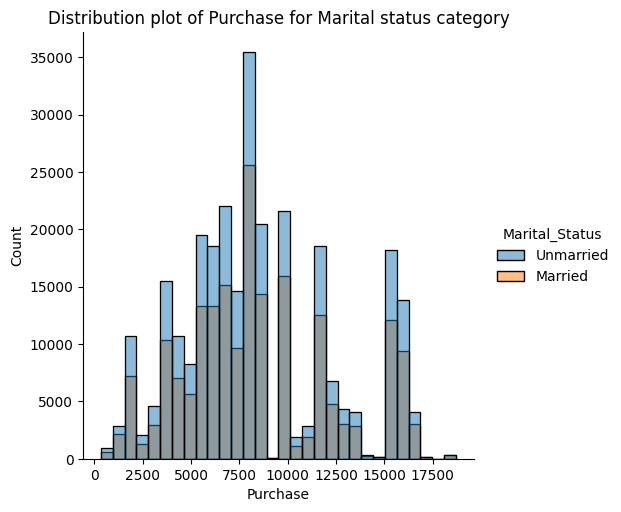

In [468]:
sns.displot(data=df, x='Purchase', hue='Marital_Status', bins=30)
plt.title('Distribution plot of Purchase for Marital status category')
plt.show()

In [469]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,196000.0,8426.641587,3906.092658,342.0,5479.0,7911.0,10992.25,18708.0
Unmarried,283445.0,8409.862252,3928.075401,343.0,5451.0,7893.0,11370.00,18709.0


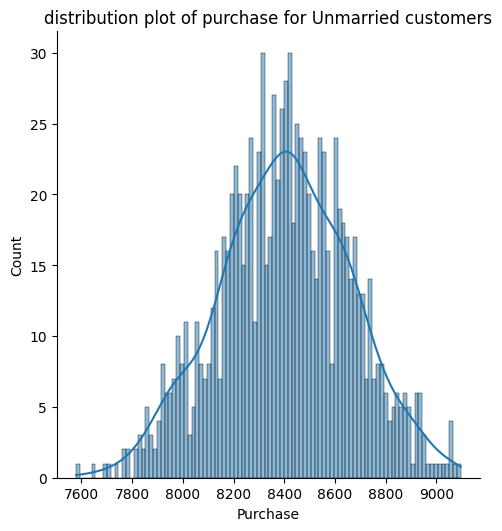

In [470]:
unmarried_expense_mean = [df[df['Marital_Status'] == 'Unmarried']['Purchase'].sample(200).mean() for i in range(1000)]
sns.displot(unmarried_expense_mean, bins = 100, kde = True)
plt.xlabel('Purchase')
plt.title('distribution plot of purchase for Unmarried customers')
plt.show()

In [471]:
pd.Series(unmarried_expense_mean).mean(),pd.Series(unmarried_expense_mean).std() 

(8402.38028, 259.8776967411499)

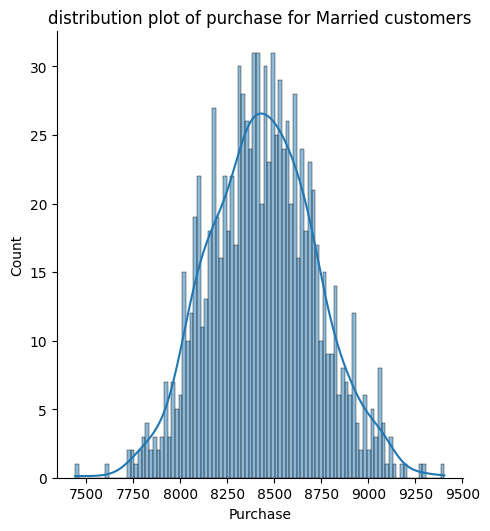

In [472]:
married_expense_mean = [df[df['Marital_Status'] == 'Married']['Purchase'].sample(200).mean() for i in range(1000)]
sns.displot(married_expense_mean, bins = 100, kde = True)
plt.xlabel('Purchase')
plt.title('distribution plot of purchase for Married customers')
plt.show()

In [473]:
pd.Series(married_expense_mean).mean(), pd.Series(unmarried_expense_mean).std()

(8440.945175, 259.8776967411499)

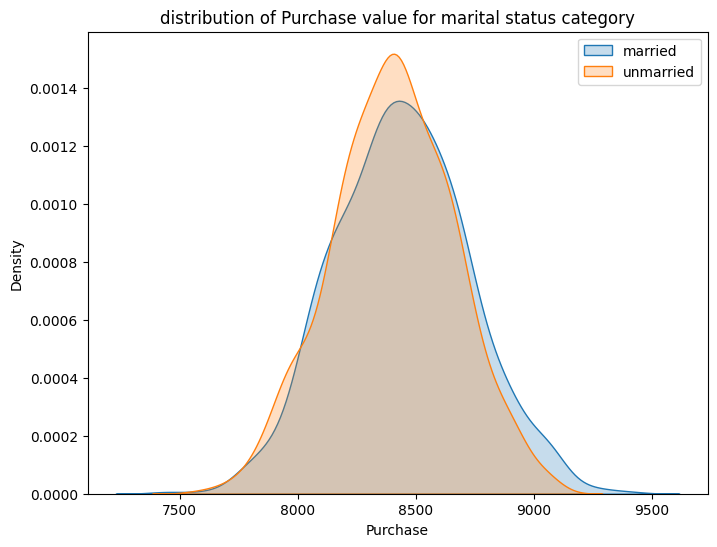

In [474]:
plt.figure(figsize=(8,6))
sns.kdeplot(married_expense_mean,shade=True, label='married')
sns.kdeplot(unmarried_expense_mean,shade=True, label='unmarried')
plt.xlabel('Purchase')
plt.legend()
plt.title('distribution of Purchase value for marital status category')
plt.show()

**there is a huge overlap between puchase values of married and unmarried customers. This significant overlap suggests that the data points for different marital status category are spread over similar ranges or have similar patterns.**

In [475]:
Confidence_Dict = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict.items():
    lower_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() - (pd.Series(unmarried_expense_mean).std() *value),2)
    upper_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() + (pd.Series(unmarried_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All unmarried singles will lie in the range {lower_limit_unmarried, upper_limit_unmarried} with {key}")
    
for key,value in Confidence_Dict.items():
    lower_limit_married = round(pd.Series(married_expense_mean).mean() - (pd.Series(married_expense_mean).std() *value),2)
    upper_limit_married = round(pd.Series(married_expense_mean).mean() + (pd.Series(married_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All married couples will lie in the range {lower_limit_married, upper_limit_married} with {key}")

The mean of the purchase done by All unmarried singles will lie in the range (8069.74, 8735.02) with 90%
The mean of the purchase done by All unmarried singles will lie in the range (7893.02, 8911.74) with 95%
The mean of the purchase done by All unmarried singles will lie in the range (7731.9, 9072.86) with 99%
The mean of the purchase done by All married couples will lie in the range (8077.08, 8804.81) with 90%
The mean of the purchase done by All married couples will lie in the range (7883.78, 8998.11) with 95%
The mean of the purchase done by All married couples will lie in the range (7707.54, 9174.35) with 99%


**There's no spending behavioral in married and unmarried customers in walmart. So, there are no insights of whether there is any spending pattern between married and unmarried customers on which walmart can focus to improve sales**

# CLT for Age

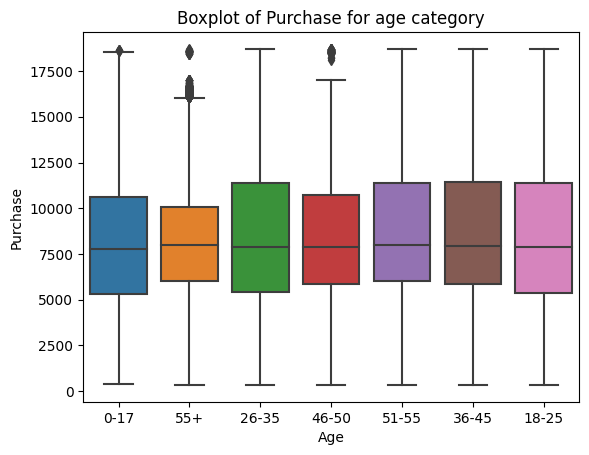

In [476]:
sns.boxplot(x = 'Age', y = 'Purchase', data = df)
plt.title('Boxplot of Purchase for age category')
plt.show()

**50 percentile of all the age groups are almost the same**

In [477]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,13322.0,8062.044588,4012.781775,386.0,5297.0,7788.5,10605.75,18666.0
18-25,87631.0,8310.602447,3976.789219,345.0,5377.0,7859.0,11372.00,18708.0
26-35,191994.0,8391.844672,3923.119338,342.0,5439.0,7874.0,11376.00,18709.0
36-45,95643.0,8504.338791,3920.625420,342.0,5836.0,7923.0,11415.50,18707.0
46-50,39673.0,8424.128223,3858.477407,343.0,5868.0,7907.0,10744.00,18703.0
51-55,32801.0,8639.769031,3837.305442,347.0,5998.0,7991.0,11371.00,18706.0
55+,18381.0,8569.631250,3756.407452,349.0,6035.0,8014.0,10042.00,18687.0


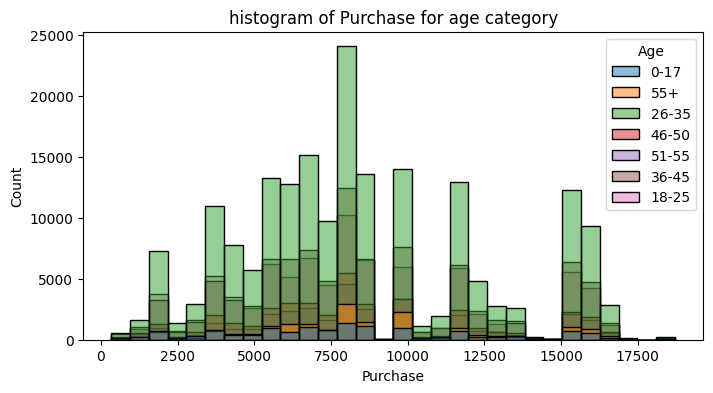

In [478]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Purchase', hue='Age', bins=30)
plt.title('histogram of Purchase for age category')
plt.show()

**Age 26-35 contributes to the maximum sales in walmart**

In [479]:
ages = df['Age'].unique().tolist()
ages

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

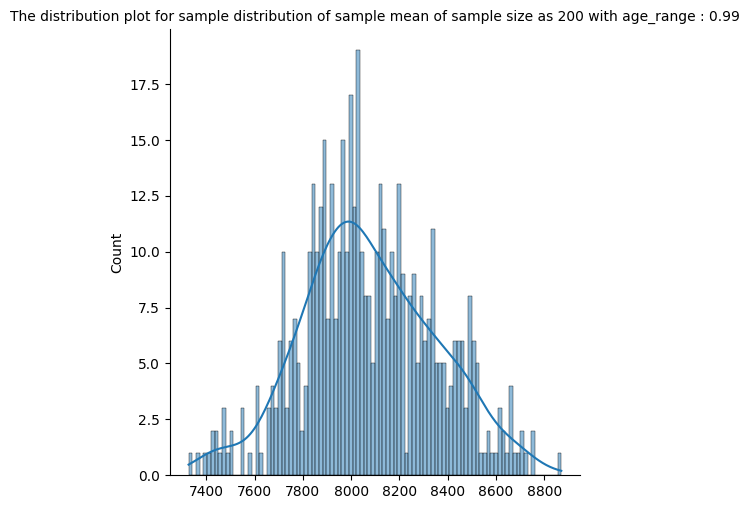

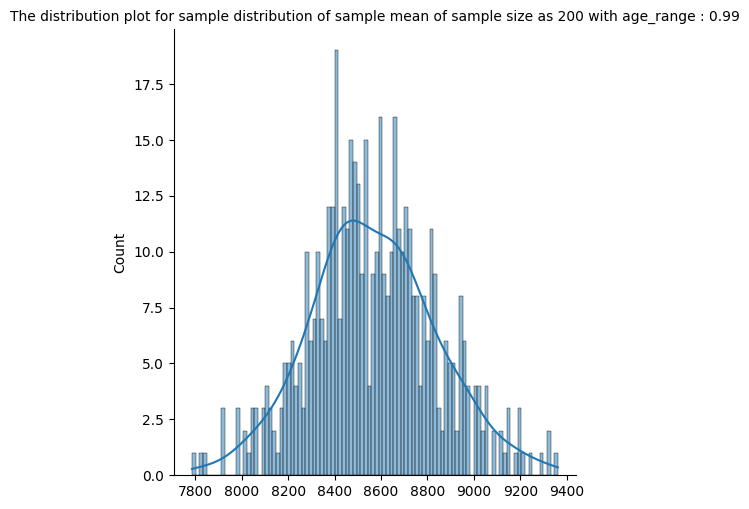

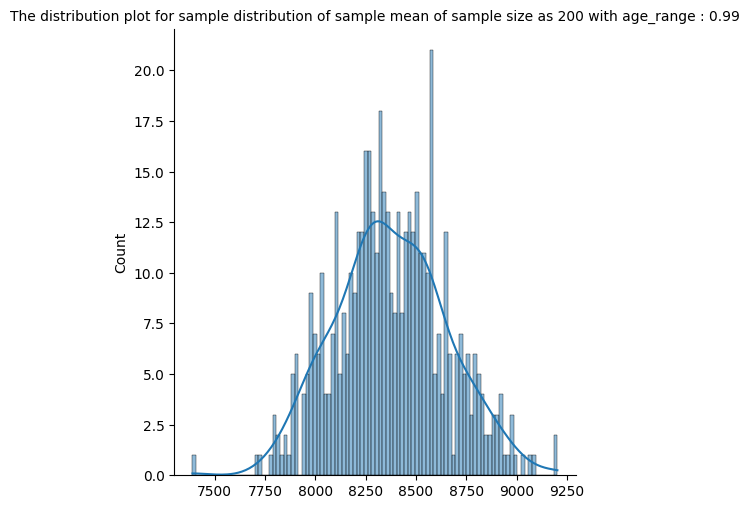

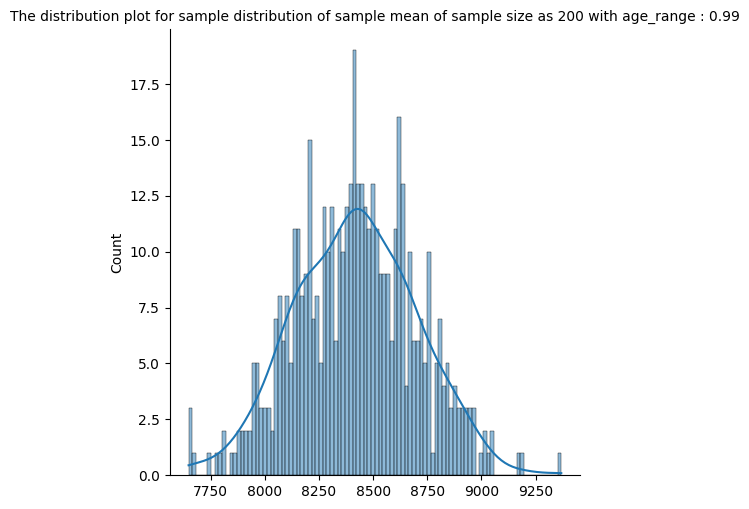

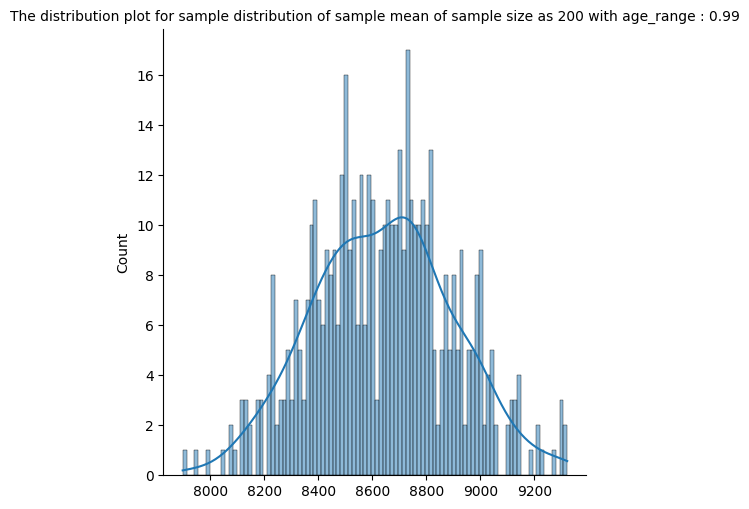

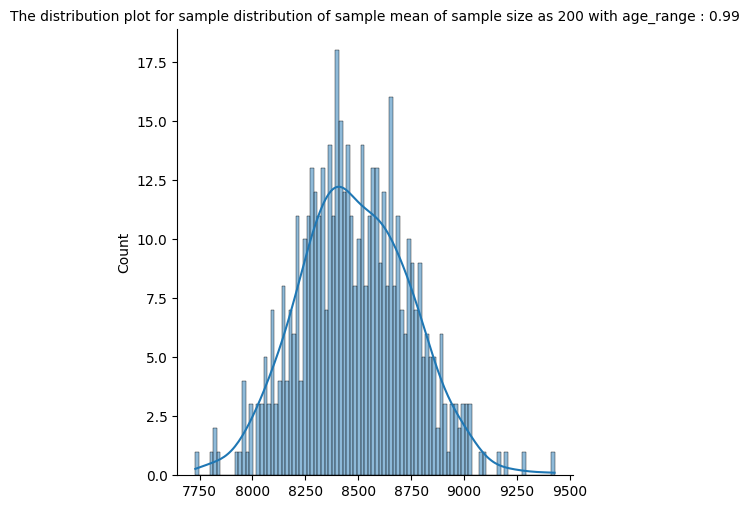

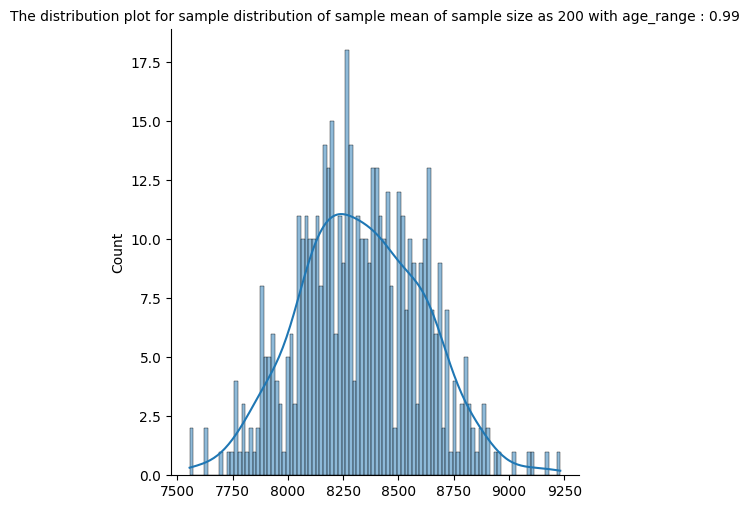

In [480]:
for age in ages:
    age_mean = [df[df['Age']==age]['Purchase'].sample(200).mean() for i in range(500)]
    sns.displot(age_mean, bins=100,kde=True)
    plt.title(f"The distribution plot for sample distribution of sample mean of sample size as 200 with age_range : {i}", size = 10)
    plt.show()
    

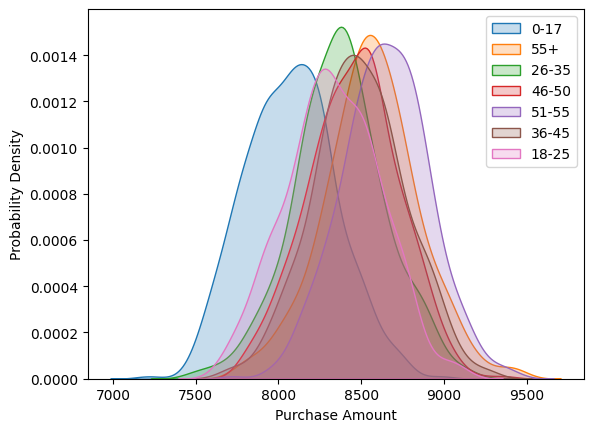

In [481]:
for age in ages:
    age_mean = [df[df['Age']==age]['Purchase'].sample(200).mean() for i in range(500)]
    sns.kdeplot(age_mean,shade=True, label=age)
    
plt.legend()
plt.xlabel('Purchase Amount')
plt.ylabel('Probability Density')   
plt.show()   

**There is huge overlap between age categories in purchase amount. This indicates that there is no strong distinction between the age categories. So we cannot find any purchasing pattern between different age groups**

**Answering questions:**

**Are women spending more money per transaction than men? Why or Why not?** 

    --From the above analysis, men are spending more money as compared to women. If we dive deep into the analysis, we see that male population is more than female population and unmarried population is more than married population, So we may conclude that unmarried males are purchasing more items resulting in spending more money. 

**Confidence intervals and distribution of the mean of the expenses by female and male customers**

    Interval for Population Female average spending under 95% confidence interval: (8029.865578980216, 8071.75064731655)
    Interval for Population Male average spending under 95% confidence interval: (8527.475203247614, 8553.518854124286)
    
**Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

    --there is no significance overlapping between male and female purchase. Male purchase amount is higher than female purchase amount. The small overlap suggests that the data points for the different gender categories are concentrated in distinct regions of the feature space. So, there is no pattern on which walmart can focus to improve sales based on male and female purchase amount

**Results when the same activity is performed for Married vs Unmarried**

    The mean of the purchase done by All unmarried singles will lie in the range (8069.74, 8735.02) with 90%
    The mean of the purchase done by All unmarried singles will lie in the range (7893.02, 8911.74) with 95%
    The mean of the purchase done by All unmarried singles will lie in the range (7731.9, 9072.86) with 99%
    The mean of the purchase done by All married couples will lie in the range (8077.08, 8804.81) with 90%
    The mean of the purchase done by All married couples will lie in the range (7883.78, 8998.11) with 95%
    The mean of the purchase done by All married couples will lie in the range (7707.54, 9174.35) with 99%

    --There's no spending behavioral in married and unmarried customers in walmart. So, there are no insights of whether there is any spending pattern between married and unmarried customers on which walmart can focus to improve sales


**Results when the same activity is performed for Age**

    --There is huge overlap between sample distribution of age categories in purchase amount. This indicates that there is no strong distinction between the age categories. So we cannot find any purchasing pattern between different age groups

Based on the insights from the above graphs, here are some **recommendations** for Walmart to consider:

1. **Target Marketing**: Since the highest purchase value falls between 5k to 10k for both male and female populations, Walmart can target marketing campaigns and promotions to attract more customers in this price range.

2. **Gender-specific Strategies**: Given that 75.31% of users are male and they are making more purchases than females, Walmart can focus on tailoring specific strategies to attract and retain female customers. Understanding the preferences and needs of female customers can help in developing targeted marketing initiatives.

3. **City Category B**: As the city category B has the highest percentage of users, Walmart can focus on expanding its presence and offerings in these cities to capitalize on the large user base.

4. **Age Group 26-35**: Since customers in the age group of 26-35 contribute the most to sales, Walmart can design promotions and products that cater to this age group's preferences and needs.

5. **Marital Status**: Since there are more number of unmarried customers, analyzing the preferences and purchase behavior of unmarried customers can help Walmart tailor marketing strategies to target this segment effectively.

6. **Product Category 5**: Since product category 5 is the maximum selling category, Walmart can focus on maintaining a wide variety of products in this category and consider cross-selling or upselling strategies.

7. **Occupations 0 and 4**: Walmart can explore targeted advertising or promotions to attract customers from occupations 0 and 4, which have the highest purchase counts.

8. **City Category C**: Although city category B has the maximum number of users, city category C contributes the most purchase amount. Understanding the factors that drive higher purchase amounts in city category C can help replicate successful strategies in other locations.

9. **Age Group 55+ and 51-55**: Since these age groups contribute significantly to purchase amounts, Walmart can offer products and services that cater to the needs of these age groups, potentially in the health and wellness or leisure categories.

10. **Gender-specific Age Group**: Considering the difference in purchase amounts based on age groups in male and female customers, Walmart can create personalized marketing approaches for each age group to increase customer loyalty and spending.

11. **Male Customers**: Given that male customers are contributing more towards total sales, Walmart can focus on offering products and services that cater to the preferences and needs of male customers. Marketing campaigns can be designed to attract and retain male customers.

3. **Purchase Amount**: Walmart can further analyze the reasons behind the difference in mean purchase amounts between male and female customers and use these insights to optimize pricing and promotional strategies.

4. **Confidence Intervals**: The calculated confidence intervals provide valuable information about the average spending of male and female customers. Walmart can use these intervals to make data-driven decisions and forecast future sales and revenue.

5. **Purchase Distribution**: Understanding the non-normal distribution of purchase values for male and female customers can help Walmart develop appropriate statistical models for sales forecasting and inventory management.

6. **Sample Size**: Walmart can use the insight that the standard error decreases with an increase in sample size to ensure sufficient data is collected for accurate analysis and decision-making.

7. **Marital Status Distribution**: Although there is no significant difference in mean purchase amounts between married and unmarried customers, Walmart can still use customer data to create personalized marketing strategies that resonate with both groups.

8. **Age Categories Distribution**: Since there is a significant overlap between age categories in purchase amount, Walmart can consider segmenting its product offerings and marketing campaigns based on other factors such as interests, preferences, or location.

9. **Customer Experience**: Walmart can focus on improving the overall customer experience, regardless of gender, marital status, or age group. Providing excellent customer service, personalized recommendations, and loyalty programs can enhance customer satisfaction and increase sales.

10. **Data-Driven Decision Making**: The insights from the confidence intervals can guide Walmart in making data-driven decisions, setting pricing strategies, and optimizing marketing efforts based on customer spending patterns.

11. **Continuous Monitoring**: Walmart should continue monitoring customer behavior and purchase trends to identify any emerging patterns or changes in customer preferences. Regular data analysis will enable Walmart to adapt and respond to market dynamics effectively.



